Aula 04 - Manipulação de Deep Nets
Parte 01 - Definição dos Parâmetros Iniciais para a Deep Net

In [ ]:
import zipfile
import os

##--- Download Dataset
#Dowload the file
!wget --no-check-certificate https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

#Decompress the folder
local_zip = './cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()
zip_ref.close()

## -- Variable Definition

# declare the location of out training and validation files
base_dir = 'cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

#cat and dog folders for training
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

#cat and dog folders for validation
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')


--2023-02-02 12:21:16--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.163.128, 172.253.115.128, 172.253.122.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.163.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M   220MB/s    in 0.3s    

2023-02-02 12:21:17 (220 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [ ]:
 #Quantidade de imagens
 print(len(os.listdir(train_cats_dir)))
 print(len(os.listdir(train_dogs_dir)))
 print(len(os.listdir(validation_cats_dir)))
 print(len(os.listdir(validation_dogs_dir)))

1000
1000
500
500


In [ ]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    # since Conv2D is the first layer of the neural network, we should also specify the size of the input
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150,150,3)),
    # apply pooling
    tf.keras.layers.MaxPooling2D(2,2),
    # and repeat the process
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    #flatten the result to feed it to the dense layer
    tf.keras.layers.Flatten(),
    # and define 512 neurons for processing the output coming by the previous layers
    tf.keras.layers.Dense(512, activation='relu'),
    # a single output neuron. The result will be 0 if the image is a cat, 1 if it is a dog
    tf.keras.layers.Dense(1, activation='sigmoid') 
])

Parte 02 - Definição da Representação e Funções da Deep Net

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

Parte 03 - Treinando uma Deep Net

In [ ]:
from tensorflow.python import metrics
model.compile(optimizer="adam",
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
from tensorflow.python.ops.batch_ops import batch
#pré-processamento das imagens
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#we rescale all our images with the rescale parameter
train_datagen = ImageDataGenerator(rescale = 1.0/255)
test_datagen = ImageDataGenerator(rescale = 1.0/255)

#we use flow_from_directory to create a generator for training
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150,150))

#we use flow_from_directory to create a generator for validation
validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        batch_size=20,
                                                        class_mode='binary',
                                                        target_size=(150,150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
#Treinamento do modelo
history = model.fit(
    train_generator, #pass in the training generator
    steps_per_epoch=100,
    epochs=15,
    validation_data=validation_generator, #pass in the validation generator
    validation_steps=50,
    verbose=2
)

Epoch 1/15
100/100 - 39s - loss: 0.6972 - accuracy: 0.5810 - val_loss: 0.6561 - val_accuracy: 0.6010 - 39s/epoch - 385ms/step
Epoch 2/15
100/100 - 41s - loss: 0.6135 - accuracy: 0.6775 - val_loss: 0.5790 - val_accuracy: 0.6950 - 41s/epoch - 405ms/step
Epoch 3/15
100/100 - 37s - loss: 0.5256 - accuracy: 0.7400 - val_loss: 0.5770 - val_accuracy: 0.6910 - 37s/epoch - 372ms/step
Epoch 4/15
100/100 - 36s - loss: 0.4696 - accuracy: 0.7775 - val_loss: 0.6053 - val_accuracy: 0.6810 - 36s/epoch - 355ms/step
Epoch 5/15
100/100 - 36s - loss: 0.3821 - accuracy: 0.8200 - val_loss: 0.6429 - val_accuracy: 0.6880 - 36s/epoch - 357ms/step
Epoch 6/15
100/100 - 39s - loss: 0.3161 - accuracy: 0.8645 - val_loss: 0.6769 - val_accuracy: 0.7250 - 39s/epoch - 385ms/step
Epoch 7/15
100/100 - 36s - loss: 0.2065 - accuracy: 0.9190 - val_loss: 0.7604 - val_accuracy: 0.7060 - 36s/epoch - 363ms/step
Epoch 8/15
100/100 - 36s - loss: 0.1560 - accuracy: 0.9455 - val_loss: 0.9905 - val_accuracy: 0.7040 - 36s/epoch - 357

Parte 05 - Analisando os Resultados


Text(0.5, 1.0, 'Loss in training and validation')

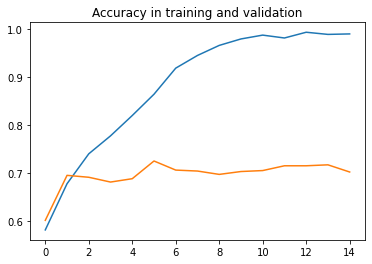

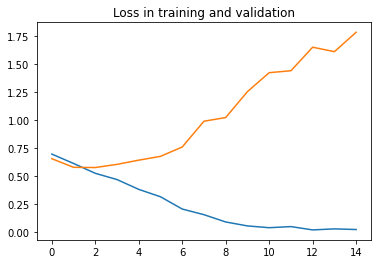

In [ ]:
# get the metrics from history
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc)) 

# plot accuracy with matplotlib
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Accuracy in training and validation')
plt.figure()

# plot loss with matplotlib
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Loss in training and validation')

In [ ]:
import numpy as np

from google.colab import files
#from keras.preprocessing import image
from keras.utils import load_img, img_to_array

uploaded = files.upload()

for fn in uploaded.keys():
 
  # prediction on the uploaded image
  path = '/content/' + fn # load the image on Colab
  img = load_img(path, target_size=(150, 150)) # let's use load_img to scale it 
  
  # scaling process
  x = img_to_array(img)
  x /= 255 
  x = np.expand_dims(x, axis=0)
  # flatten the output
  images = np.vstack([x])
  
  # prediction!
  classes = model.predict(images, batch_size=10)
  
  print(classes[0])

  if classes[0]>0.5:
    print(fn + " é um cachorro!")
  else:
    print(fn + " é um gato!")

Saving gato2.jfif to gato2.jfif
1/1 [==============================] - 0s 23ms/step
[0.9870441]
gato2.jfif é um cachorro!
